Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

Загрузка данных

In [3]:
try:
    df_train = pd.read_excel('train_new.xlsx')
    df_test = pd.read_excel('test_new.xlsx')
except FileNotFoundError:
    print("Один из файлов (train_new.xlsx или test_new.xlsx) не найден.")
    exit()
except Exception as e:
    print(f"Произошла ошибка при загрузке данных: {e}")
    exit()


Подготовка данных

In [4]:
# Преобразуем столбец dt в числовой формат (количество дней с начала отсчета)
# Линейная регрессия лучше работает с числовыми данными, чем с датами
df_train['dt_numeric'] = (df_train['dt'] - df_train['dt'].min()).dt.days
df_test['dt_numeric'] = (df_test['dt'] - df_test['dt'].min()).dt.days

# Выбираем признаки и целевую переменную
X_train = df_train[['dt_numeric']]  # Признак - числовое представление даты
y_train = df_train['Цена на арматуру']  # Целевая переменная - цена на арматуру
X_test = df_test[['dt_numeric']]
y_test = df_test['Цена на арматуру']

In [5]:
# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)



LinearRegression()

In [6]:
# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

In [7]:
# Рассчитываем метрики оценки
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 6598.61
RMSE: 8647.65


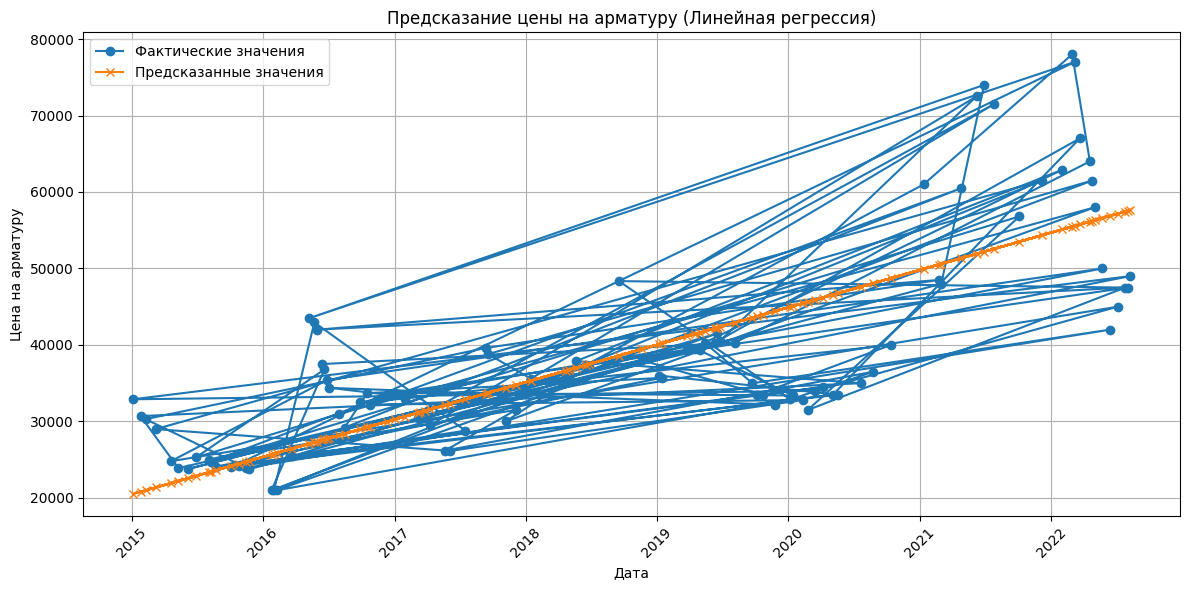

In [8]:
# Строим график фактических и предсказанных значений
plt.figure(figsize=(12, 6))
plt.plot(df_test['dt'], y_test, marker='o', label='Фактические значения')
plt.plot(df_test['dt'], y_pred, marker='x', label='Предсказанные значения')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.title('Предсказание цены на арматуру (Линейная регрессия)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Импорт библиотек

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge  # L2 регуляризация
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

Загрузка данных

In [10]:
try:
    df = pd.read_excel('train_new.xlsx', index_col='dt', parse_dates=['dt'])
    print("Файл успешно загружен.")
except FileNotFoundError:
    print("Файл train_new.xlsx не найден.")
    exit()
except Exception as e:
    print(f"Произошла ошибка при загрузке файла: {e}")
    exit()

Файл успешно загружен.


Сортировка по дате 


In [11]:
# Убедимся, что данные отсортированы по дате
df = df.sort_index()
print("Данные отсортированы по дате.")

Данные отсортированы по дате.


Создание новых признаков

In [14]:


# Feature Engineering (Создание новых признаков)
for i in range(1, 4):
    df[f'Цена_лаг_{i}'] = df['Цена на арматуру'].shift(i)

df['Цена_скользящая_3'] = df['Цена на арматуру'].rolling(window=3).mean()

df['Разность_цен'] = df['Цена на арматуру'].diff()

# Создаем временные признаки (ИСПОЛЬЗУЕМ ИНДЕКС, А НЕ СТОЛБЕЦ)
df['Месяц'] = df.index.month

print("Новые признаки созданы.")


Новые признаки созданы.


Обработка пропущенных значений

In [15]:
# Удаляем строки с пропущенными значениями
df = df.dropna()
print("Пропущенные значения обработаны (строки с NaN удалены).")

Пропущенные значения обработаны (строки с NaN удалены).


Разделение на признаки и целевую переменную, и на тренировочную и тестовую выборки

In [16]:
# Разделяем на признаки (X) и целевую переменную (y)
X = df.drop('Цена на арматуру', axis=1)
y = df['Цена на арматуру']

# Разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42) #shuffle = False чтобы не перемешивать временной ряд
print("Данные разделены на тренировочную и тестовую выборки.")

Данные разделены на тренировочную и тестовую выборки.


Масштабирование признаков (StandardScaler)

In [17]:
# Масштабируем признаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Признаки масштабированы.")



Признаки масштабированы.


Обучение модели (Ridge Regression с L2 регуляризацией)

In [18]:
# Создаем и обучаем модель Ridge Regression
model = Ridge(alpha=1.0)  #  alpha - параметр регуляризации
model.fit(X_train, y_train)
print("Модель обучена.")

Модель обучена.


Предсказание на тестовых данных

In [19]:
# Предсказываем на тестовых данных
y_pred = model.predict(X_test)
print("Предсказания сделаны.")



Предсказания сделаны.


 Оценка модели

In [20]:
# Оцениваем результаты
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")



MAE: 174.66
RMSE: 251.12


 Визуализация результатов

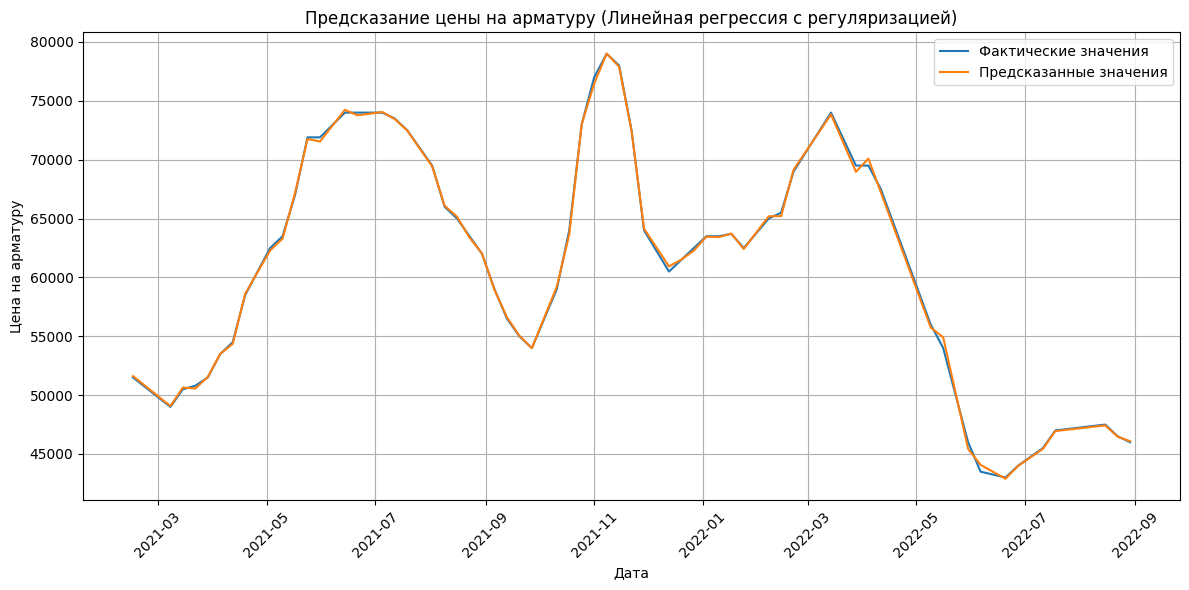

In [21]:
# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Фактические значения')
plt.plot(y_test.index, y_pred, label='Предсказанные значения')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.title('Предсказание цены на арматуру (Линейная регрессия с регуляризацией)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Данные успешно загружены.
Средняя Абсолютная Ошибка (MAE): 27064.67
Средняя Квадратичная Ошибка (MSE): 837182359.75
Корень из Средней Квадратичной Ошибки (RMSE): 28934.10


C:\Users\User\AppData\Local\Temp\ipykernel_6780\2542950874.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['цена_арматуры'].fillna(df['цена_арматуры'].mean(), inplace=True)  # Или используйте .interpolate()


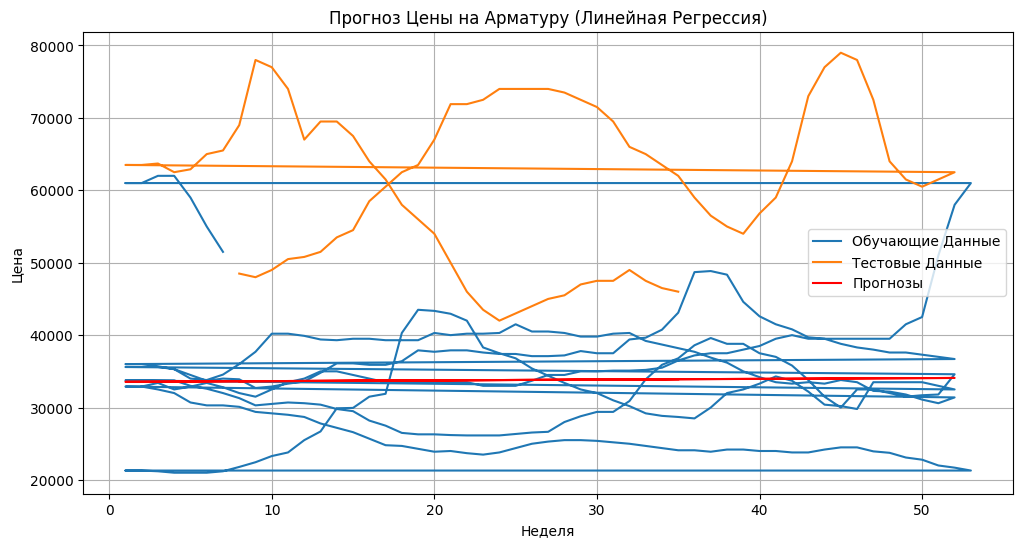

Прогнозы на следующие 10 недель:
Неделя 36: 33920.69
Неделя 37: 33931.05
Неделя 38: 33941.42
Неделя 39: 33951.79
Неделя 40: 33962.15
Неделя 41: 33972.52
Неделя 42: 33982.88
Неделя 43: 33993.25
Неделя 44: 34003.61
Неделя 45: 34013.98
Прогнозируемая цена арматуры на 10-ю неделю: 34013.98


c:\Users\User\Documents\GitHub\intens3\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. Загрузка и Подготовка Данных
try:
    df = pd.read_excel('train.xlsx')  # Замените 'train.xlsx' на имя вашего файла Excel
    print("Данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл train.xlsx не найден. Убедитесь, что файл находится в той же папке, что и блокнот.")
    df = None

if df is not None:
    # Переименование столбцов для удобства
    df.rename(columns={'dt': 'дата', 'Цена на арматуру': 'цена_арматуры'}, inplace=True)

    # Убедитесь, что столбец 'дата' имеет тип datetime
    df['дата'] = pd.to_datetime(df['дата'], errors='coerce')

    # Установите 'дата' в качестве индекса (важно для временных рядов)
    df.set_index('дата', inplace=True)

    # Сортировка по дате (данные временных рядов должны быть в хронологическом порядке)
    df.sort_index(inplace=True)

    # Обработка пропущенных значений (очень важно!). Простой пример: заполнение средним значением
    # Более сложный подход может заключаться в замене или использовании более надежной модели.
    df['цена_арматуры'].fillna(df['цена_арматуры'].mean(), inplace=True)  # Или используйте .interpolate()

    # Создание столбца "Неделя" (или других признаков на основе даты)
    df['неделя'] = df.index.isocalendar().week.astype(int) # Convert to int to avoid future issues

    # 2. Разделение на Обучающую и Тестовую Выборки
    # Мы используем "неделя" в качестве признака (X) и "цена_арматуры" в качестве целевой переменной (y)
    X = df[['неделя']]  # Признаки (features)
    y = df['цена_арматуры']  # Целевая переменная (target)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)  # 80/20 split

    # 3. Обучение Модели Линейной Регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 4. Прогнозирование
    y_pred = model.predict(X_test)

    # 5. Оценка Модели
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'Средняя Абсолютная Ошибка (MAE): {mae:.2f}')
    print(f'Средняя Квадратичная Ошибка (MSE): {mse:.2f}')
    print(f'Корень из Средней Квадратичной Ошибки (RMSE): {rmse:.2f}')

    # 6. Визуализация Результатов
    plt.figure(figsize=(12, 6))
    plt.plot(X_train['неделя'], y_train, label='Обучающие Данные')
    plt.plot(X_test['неделя'], y_test, label='Тестовые Данные')
    plt.plot(X_test['неделя'], y_pred, label='Прогнозы', color='red')

    plt.title('Прогноз Цены на Арматуру (Линейная Регрессия)')
    plt.xlabel('Неделя')
    plt.ylabel('Цена')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Прогнозирование на 10-ю неделю вперед (предполагая, что это продолжение последовательности недель)
    last_week = X['неделя'].iloc[-1]
    future_weeks = np.arange(last_week + 1, last_week + 11).reshape(-1, 1) #Create next 10 weeks

    future_prices = model.predict(future_weeks)

    print("Прогнозы на следующие 10 недель:")
    for i, price in enumerate(future_prices):
        print(f"Неделя {future_weeks[i][0]}: {price:.2f}")
    #Вывод результата 10 недели
    print(f"Прогнозируемая цена арматуры на 10-ю неделю: {future_prices[9]:.2f}")


else:
    print("Загрузка данных не удалась. Пожалуйста, проверьте файл данных и путь к нему.")

вывод: В среднем, отклонение составляет всего 174.66 единиц (MAE), а RMSE (учитывая большие ошибки) - 251.12.

In [23]:
import numpy
print(numpy.__version__)

2.2.4


In [25]:
import numpy
print(numpy.__file__)

d:\python\Lib\site-packages\numpy\__init__.py


In [ ]:
import pandas as pd

# Загрузка данных в df_train.
try:
    df_train = pd.read_excel('train.xlsx')  # Замените 'train.xlsx' на имя вашего файла Excel
    print("Данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл train.xlsx не найден. Убедитесь, что файл находится в той же папке, что и блокнот.")
    df_train = None  # Если загрузка не удалась, установите значение None

if df_train is not None:
    print(df_train.head()) # Show the first few rows
    print(df_train.info()) # Print data types and null counts
    description = df_train.describe()
    print(description)  # Вывод описательных статистик

Данные успешно загружены.
          dt  Цена на арматуру
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
3 2015-01-26             30700
4 2015-02-02             30300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
None
                        dt  Цена на арматуру
count                  400        400.000000
mean   2018-11-01 12:00:00      39229.475000
min    2015-01-05 00:00:00      21000.000000
25%    2016-12-03 06:00:00      31075.000000
50%    2018-11-01 12:00:00      35450.000000
75%    2020-09-29 18:00:00      42000.000000
max    2022-08-29 00:00:00      79000.000000
std                    NaN      13407.979668


In [5]:
import pandas as pd

# Загрузка данных в df_train.
try:
    df_train = pd.read_excel('train.xlsx')  # Замените 'train.xlsx' на имя вашего файла Excel
    print("Данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл train.xlsx не найден. Убедитесь, что файл находится в той же папке, что и блокнот.")
    df_train = None  # Если загрузка не удалась, установите значение None

if df_train is not None:
    print(df_train.columns)
    print(df_train.head()) # Show the first few rows
    print(df_train.info()) # Print data types and null counts
    description = df_train.describe()
    print(description)  # Вывод описательных статистик

Данные успешно загружены.
Index(['dt', 'Цена на арматуру'], dtype='object')
          dt  Цена на арматуру
0 2015-01-05             32900
1 2015-01-12             32500
2 2015-01-19             32000
3 2015-01-26             30700
4 2015-02-02             30300
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
None
                        dt  Цена на арматуру
count                  400        400.000000
mean   2018-11-01 12:00:00      39229.475000
min    2015-01-05 00:00:00      21000.000000
25%    2016-12-03 06:00:00      31075.000000
50%    2018-11-01 12:00:00      35450.000000
75%    2020-09-29 18:00:00      42000.000000
max    2022-08-29 00:00:00      79000.000

C:\Users\User\AppData\Local\Temp\ipykernel_12044\2742489160.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['цена_арматуры'].fillna(df_train['цена_арматуры'].mean(), inplace=True)  # Или используйте .interpolate()


Размер обучающей выборки: 320
Размер тестовой выборки: 80
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  320
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2699.903
Date:                Tue, 25 Mar 2025   AIC                           5411.807
Time:                        12:02:11   BIC                           5434.398
Sample:                    01-05-2015   HQIC                          5420.829
                         - 02-15-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5086      0.208      2.440      0.015       0.100       0.917
ar.L2          0.7012      0.266      2.634      0.008       0.179       

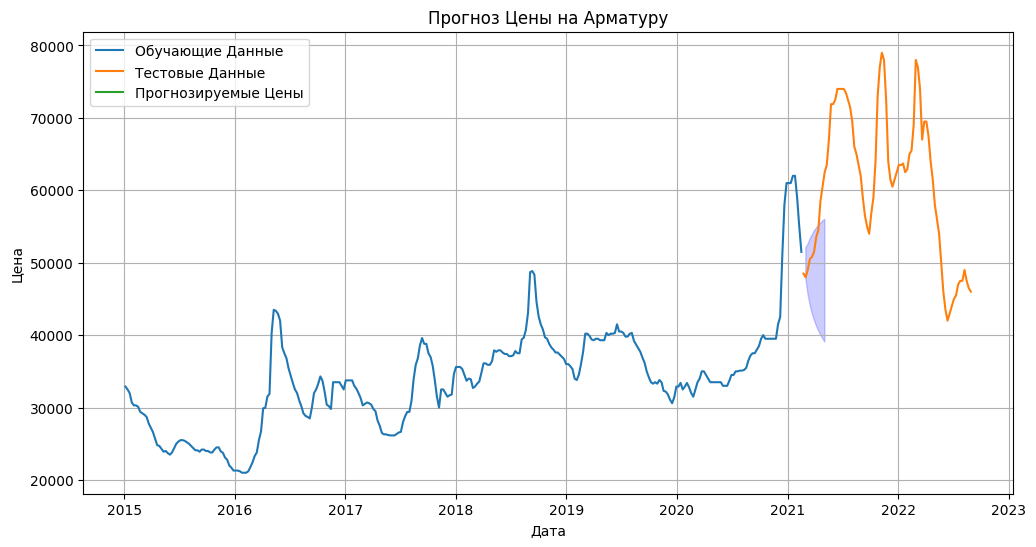

Прогнозируемая цена арматуры на 10-ю неделю: nan


In [6]:
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# **ВАЖНО: Проверяем, что df_train был загружен и существует**
if 'df_train' not in locals() or df_train is None:
    print("Ошибка: df_train не загружен. Сначала запустите первую ячейку (загрузку данных).")
else:
    # Переименование столбцов для удобства
    df_train.rename(columns={'dt': 'дата', 'Цена на арматуру': 'цена_арматуры'}, inplace=True)

    # Убедитесь, что столбец 'дата' имеет тип datetime
    df_train['дата'] = pd.to_datetime(df_train['дата'], errors='coerce')

    # Установите 'дата' в качестве индекса (важно для временных рядов)
    df_train.set_index('дата', inplace=True)

    # Сортировка по дате (данные временных рядов должны быть в хронологическом порядке)
    df_train.sort_index(inplace=True)

    # Обработка пропущенных значений (очень важно!). Простой пример: заполнение средним значением
    # Более сложный подход может заключаться в замене или использовании более надежной модели.
    df_train['цена_арматуры'].fillna(df_train['цена_арматуры'].mean(), inplace=True)  # Или используйте .interpolate()

    # 2. Разделение на Обучающую и Тестовую Выборки
    train_size = int(len(df_train) * 0.8)  # Используем 80% для обучения
    train_df, test_df = df_train.iloc[:train_size], df_train.iloc[train_size:]

    #Вывод размеров выборок для проверки
    print(f"Размер обучающей выборки: {len(train_df)}")
    print(f"Размер тестовой выборки: {len(test_df)}")

    # 3. Обучение Модели ARIMA
    # Используйте auto_arima для поиска наилучших параметров ARIMA (p, d, q)
    # Подавляем предупреждения для очистки вывода
    model = pm.auto_arima(train_df['цена_арматуры'],
                          start_p=0, start_q=0,
                          max_p=5, max_q=5,  # Отрегулируйте max p и q по мере необходимости
                          m=1,              # Частота временного ряда (1 для еженедельных данных)
                          d=None,           # Позвольте модели определить 'd'
                          seasonal=False,   # Установите значение True, если данные имеют сезонность
                          trace=False,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)



    # Вывод сводки по модели
    print(model.summary())

    # 4. Прогнозирование
    n_periods = 10  # Прогнозирование на следующие 10 недель
    predicted_values, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

    # Создание диапазона дат для прогнозов
    last_date = train_df.index[-1]
    future_dates = pd.date_range(last_date + pd.Timedelta(weeks=1), periods=n_periods, freq='W')

    # Создание DataFrame для прогнозов
    predictions_df = pd.DataFrame({'прогнозируемая_цена_арматуры': predicted_values}, index=future_dates)

    # 5. Оценка Модели (на тестовой выборке)
    # Прогнозирование на тестовой выборке
    test_predictions = model.predict(n_periods=len(test_df))

    # Расчет метрик оценки
    mae = mean_absolute_error(test_df['цена_арматуры'], test_predictions)
    mse = mean_squared_error(test_df['цена_арматуры'], test_predictions)
    rmse = np.sqrt(mse)

    print(f'Средняя Абсолютная Ошибка (MAE): {mae:.2f}')
    print(f'Средняя Квадратичная Ошибка (MSE): {mse:.2f}')
    print(f'Корень из Средней Квадратичной Ошибки (RMSE): {rmse:.2f}')

    # 6. Визуализация Результатов
    plt.figure(figsize=(12, 6))
    plt.plot(train_df.index, train_df['цена_арматуры'], label='Обучающие Данные')
    plt.plot(test_df.index, test_df['цена_арматуры'], label='Тестовые Данные') # График тестовых данных
    plt.plot(predictions_df.index, predictions_df['прогнозируемая_цена_арматуры'], label='Прогнозируемые Цены')
    plt.fill_between(predictions_df.index,
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.2, color='b')  # Доверительный интервал

    plt.title('Прогноз Цены на Арматуру')
    plt.xlabel('Дата')
    plt.ylabel('Цена')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Вывод прогноза на 10-ю неделю явно:
    print(f"Прогнозируемая цена арматуры на 10-ю неделю: {predictions_df['прогнозируемая_цена_арматуры'].iloc[9]:.2f}")

Обучающие данные успешно загружены.
Тестовые данные успешно загружены.
Информация о тестовом наборе
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2022-09-05 to 2023-03-13
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   цена_арматуры  28 non-null     int64
dtypes: int64(1)
memory usage: 448.0 bytes
None
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  400
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -3486.885
Date:                Tue, 25 Mar 2025   AIC                           6977.770
Time:                        12:08:57   BIC                           6985.748
Sample:                    01-05-2015   HQIC                          6980.930
                         - 08-29-2022                                         
Covariance Type:                  opg              

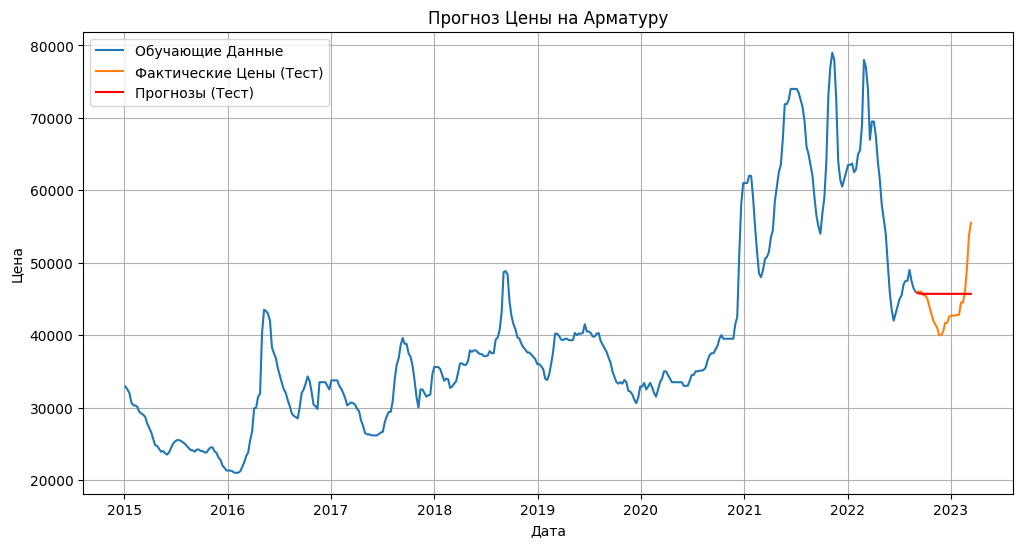

In [7]:
import pandas as pd
import numpy as np
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1. Загрузка и Подготовка Данных (Обучающие данные)
try:
    df_train = pd.read_excel('train.xlsx')  # Замените 'train.xlsx' на имя вашего обучающего файла
    print("Обучающие данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл train.xlsx не найден. Убедитесь, что файл находится в той же папке, что и блокнот.")
    df_train = None

# 2. Загрузка и Подготовка Данных (Тестовые данные)
try:
    df_test = pd.read_excel('test.xlsx')  # Замените 'test.xlsx' на имя вашего тестового файла
    print("Тестовые данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл test.xlsx не найден. Убедитесь, что файл находится в той же папке, что и блокнот.")
    df_test = None

if df_train is not None and df_test is not None:
    # Подготовка обучающих данных
    df_train.rename(columns={'dt': 'дата', 'Цена на арматуру': 'цена_арматуры'}, inplace=True)
    df_train['дата'] = pd.to_datetime(df_train['дата'], errors='coerce')
    df_train.set_index('дата', inplace=True)
    df_train.sort_index(inplace=True)
    df_train['цена_арматуры'] = df_train['цена_арматуры'].fillna(df_train['цена_арматуры'].mean())

    # Подготовка тестовых данных (ВАЖНО: убедитесь, что столбцы совпадают!)
    df_test.rename(columns={'dt': 'дата', 'Цена на арматуру': 'цена_арматуры'}, inplace=True)  # Убедитесь, что имена столбцов совпадают
    df_test['дата'] = pd.to_datetime(df_test['дата'], errors='coerce')
    df_test.set_index('дата', inplace=True)
    df_test.sort_index(inplace=True)
    df_test['цена_арматуры'] = df_test['цена_арматуры'].fillna(df_test['цена_арматуры'].mean())

    #Вывод информации о тестовом наборе
    print("Информация о тестовом наборе")
    print(df_test.info())

    # 3. Обучение Модели ARIMA
    try:
        model = pm.auto_arima(df_train['цена_арматуры'],
                              start_p=0, start_q=0,
                              max_p=5, max_q=5,
                              m=1,
                              d=None,
                              seasonal=False,
                              trace=False,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

        # Вывод сводки по модели
        print(model.summary())

        # 4. Прогнозирование на тестовых данных
        test_predictions = model.predict(n_periods=len(df_test))

        # 5. Оценка Модели
        mae = mean_absolute_error(df_test['цена_арматуры'], test_predictions)
        mse = mean_squared_error(df_test['цена_арматуры'], test_predictions)
        rmse = np.sqrt(mse)

        print(f'Средняя Абсолютная Ошибка (MAE): {mae:.2f}')
        print(f'Средняя Квадратичная Ошибка (MSE): {mse:.2f}')
        print(f'Корень из Средней Квадратичной Ошибки (RMSE): {rmse:.2f}')

        # 6. Визуализация Результатов
        plt.figure(figsize=(12, 6))
        plt.plot(df_train.index, df_train['цена_арматуры'], label='Обучающие Данные')
        plt.plot(df_test.index, df_test['цена_арматуры'], label='Фактические Цены (Тест)')
        plt.plot(df_test.index, test_predictions, label='Прогнозы (Тест)', color='red')

        plt.title('Прогноз Цены на Арматуру')
        plt.xlabel('Дата')
        plt.ylabel('Цена')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Произошла ошибка при обучении или прогнозировании: {e}")

else:
    print("Загрузка данных не удалась. Пожалуйста, проверьте файлы данных и пути к ним.")

Prophet - модель от Facebook

Она хорошо справляется с данными, имеющими сезонность и тренды, и достаточно проста в использовании.

Импорт библиотек

In [8]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt



Загрузка и подготовка данных

In [10]:
try:
    # Загружаем данные
    df = pd.read_excel('train_new.xlsx', parse_dates=['dt']) # Не ставим dt индексом, так как Prophet требует столбец 'ds'
    print("Файл успешно загружен.")
except FileNotFoundError:
    print("Файл train_new.xlsx не найден.")
    exit()
except Exception as e:
    print(f"Произошла ошибка при загрузке файла: {e}")
    exit()

# Переименовываем столбцы в 'ds' (дата) и 'y' (значение) - это требования Prophet
df = df.rename(columns={'dt': 'ds', 'Цена на арматуру': 'y'})

# Сортируем по дате (если еще не отсортировано)
df = df.sort_values('ds')
print("Данные отсортированы по дате.")

# Разделяем на тренировочную и тестовую выборки
train_size = int(len(df) * 0.8)  # 80% для обучения, 20% для теста
train_df = df[:train_size]
test_df = df[train_size:]
print("Данные разделены на тренировочную и тестовую выборки.")

# Выводим первые несколько строк, чтобы убедиться, что все правильно
print(df.head())

Файл успешно загружен.
Данные отсортированы по дате.
Данные разделены на тренировочную и тестовую выборки.
            ds      y
237 2015-01-12  32500
128 2015-01-19  32000
180 2015-02-02  30300
50  2015-02-16  30100
5   2015-02-23  29400


Создание и обучение модели Prophet

In [11]:
# Создаем модель Prophet
model = Prophet()

# Обучаем модель на тренировочных данных
try:
    model.fit(train_df)
    print("Модель Prophet обучена.")
except Exception as e:
    print(f"Произошла ошибка при обучении модели Prophet: {e}")
    exit()

01:25:29 - cmdstanpy - INFO - Chain [1] start processing
01:25:29 - cmdstanpy - INFO - Chain [1] done processing


Модель Prophet обучена.


 Предсказание на тестовых данных

In [12]:
# Создаем DataFrame для предсказаний (ТОЛЬКО ДЛЯ ДАТ ИЗ TEST_DF)
future = pd.DataFrame(test_df['ds'])  #  Создаем DataFrame только с датами из test_df

# Делаем предсказания
try:
    forecast = model.predict(future)
    print("Предсказания сделаны.")
except Exception as e:
    print(f"Произошла ошибка во время предсказания: {e}")
    exit()



Предсказания сделаны.


Оценка модели

In [13]:
# Соединяем фактические и предсказанные значения
predicted = forecast['yhat'].values
actual = test_df['y'].values

# Оцениваем результаты
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 17362.52
RMSE: 20170.43


Визуализация результатов



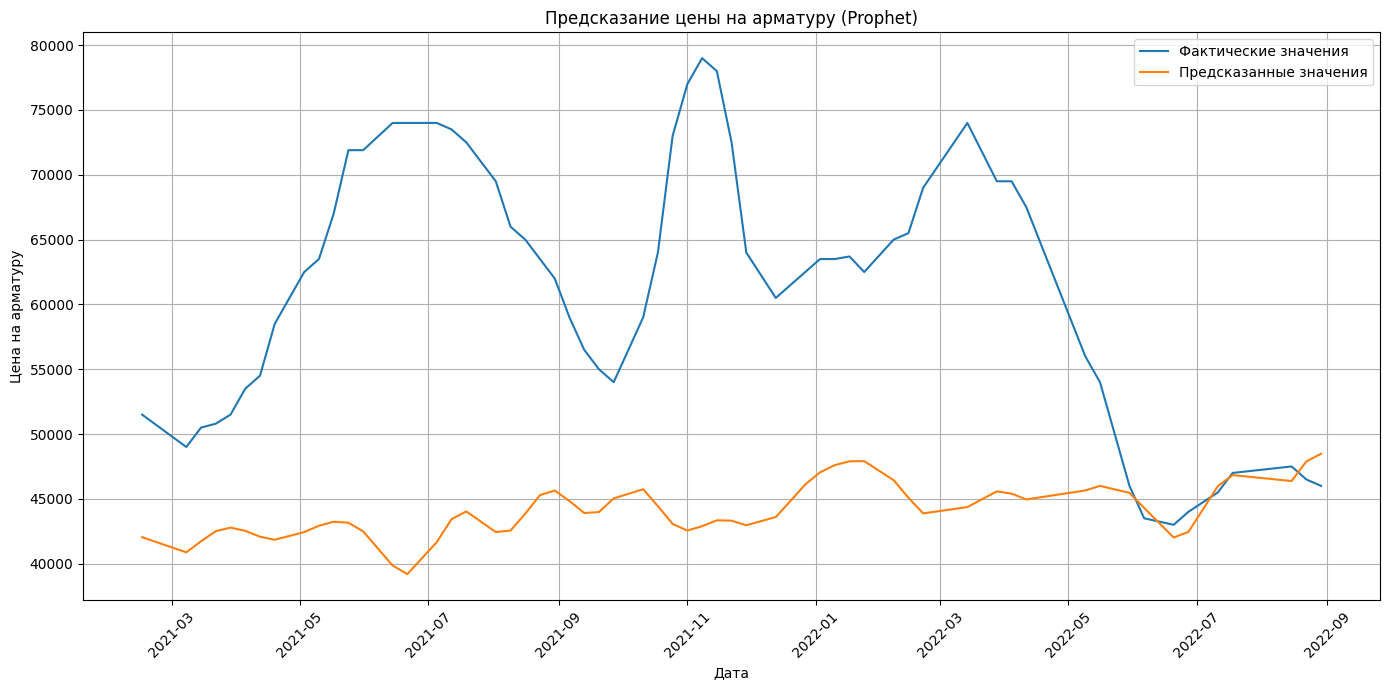

In [14]:
# Визуализируем результаты
plt.figure(figsize=(14, 7))
plt.plot(test_df['ds'], actual, label='Фактические значения')
plt.plot(test_df['ds'], predicted, label='Предсказанные значения')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.title('Предсказание цены на арматуру (Prophet)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

вывод:Модель предсказывает с большими ошибками: в среднем, отклонение составляет 17362.52 (MAE), а RMSE (учитывая большие ошибки) - еще больше, 20170.43. Модель работает плохо и требует значительной доработки. Нужно искать другие модели или сильно улучшать текущую.


c:\Users\User\Documents\GitHub\intens3\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
12:12:19 - cmdstanpy - INFO - Chain [1] start processing


Обучающие данные успешно загружены.
Тестовые данные успешно загружены.
Обучающие данные после подготовки:
          ds      y
0 2015-01-05  32900
1 2015-01-12  32500
2 2015-01-19  32000
3 2015-01-26  30700
4 2015-02-02  30300

Тестовые данные после подготовки:
          ds      y
0 2022-09-05  46000
1 2022-09-12  46000
2 2022-09-19  46000
3 2022-09-26  45500
4 2022-10-03  45500


12:12:20 - cmdstanpy - INFO - Chain [1] done processing



Объединенные данные для оценки:
          ds      y          yhat
0 2022-09-05  46000  65762.458911
1 2022-09-12  46000  66459.048875
2 2022-09-19  46000  66276.789094
3 2022-09-26  45500  65770.528968
Средняя Абсолютная Ошибка (MAE): 20192.21
Средняя Квадратичная Ошибка (MSE): 407792495.93
Корень из Средней Квадратичной Ошибки (RMSE): 20193.87


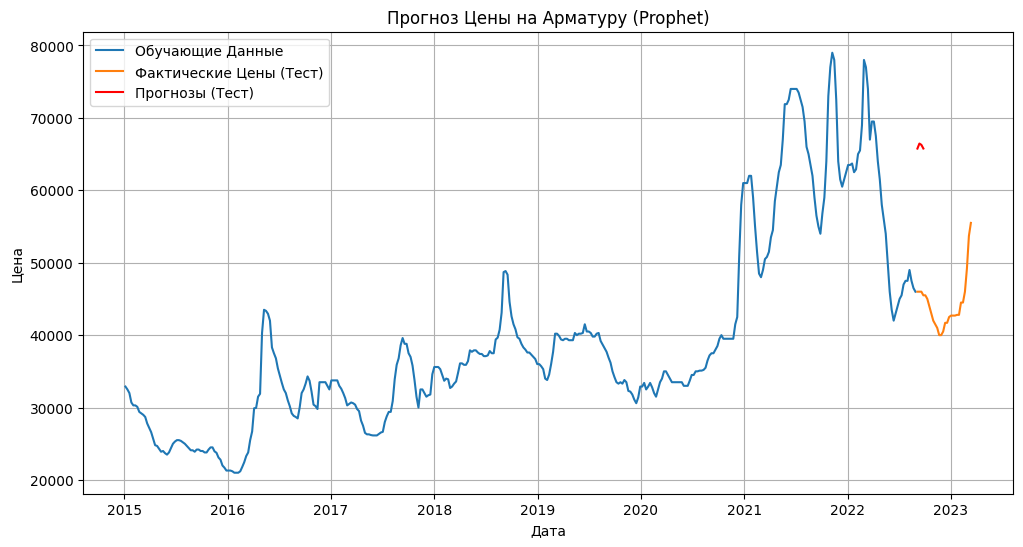

In [9]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

# 1. Загрузка и Подготовка Данных (Обучающие данные)
try:
    df_train = pd.read_excel('train.xlsx')  # Замените 'train.xlsx' на имя вашего обучающего файла
    print("Обучающие данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл train.xlsx не найден. Убедитесь, что файл находится в той же папке, что и блокнот.")
    df_train = None

# 2. Загрузка и Подготовка Данных (Тестовые данные)
try:
    df_test = pd.read_excel('test.xlsx')  # Замените 'test.xlsx' на имя вашего тестового файла
    print("Тестовые данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл test.xlsx не найден. Убедитесь, что файл находится в той же папке, что и блокнот.")
    df_test = None

if df_train is not None and df_test is not None:
    # Подготовка обучающих данных для Prophet
    df_train = df_train.rename(columns={'dt': 'ds', 'Цена на арматуру': 'y'})
    df_train['ds'] = pd.to_datetime(df_train['ds'], errors='coerce')
    df_train = df_train.sort_values('ds') # Сортируем по дате
    df_train = df_train.dropna(subset=['ds', 'y']) # Dropping NaN values
    print("Обучающие данные после подготовки:")
    print(df_train.head())

    # Подготовка тестовых данных для Prophet
    df_test = df_test.rename(columns={'dt': 'ds', 'Цена на арматуру': 'y'})
    df_test['ds'] = pd.to_datetime(df_test['ds'], errors='coerce')
    df_test = df_test.sort_values('ds')  # Sorting dataframe
    df_test = df_test.dropna(subset=['ds', 'y']) # Drop NaN values
    print("\nТестовые данные после подготовки:")
    print(df_test.head())

    # 3. Обучение Модели Prophet
    try:
        model = Prophet()
        model.fit(df_train)

        # 4. Прогнозирование на тестовых данных
        future = model.make_future_dataframe(periods=len(df_test))  # Create a future dataframe
        forecast = model.predict(future)

        # Получение прогнозов для тестового периода
        forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

        # Слияние прогнозов с тестовыми данными для оценки
        merged_df = pd.merge(df_test, forecast_test[['ds', 'yhat']], on='ds', how='inner')
        print("\nОбъединенные данные для оценки:")
        print(merged_df.head())

        # 5. Оценка Модели
        mae = mean_absolute_error(merged_df['y'], merged_df['yhat'])
        mse = mean_squared_error(merged_df['y'], merged_df['yhat'])
        rmse = np.sqrt(mse)

        print(f'Средняя Абсолютная Ошибка (MAE): {mae:.2f}')
        print(f'Средняя Квадратичная Ошибка (MSE): {mse:.2f}')
        print(f'Корень из Средней Квадратичной Ошибки (RMSE): {rmse:.2f}')

        # 6. Визуализация Результатов
        plt.figure(figsize=(12, 6))
        plt.plot(df_train['ds'], df_train['y'], label='Обучающие Данные')
        plt.plot(df_test['ds'], df_test['y'], label='Фактические Цены (Тест)')
        plt.plot(merged_df['ds'], merged_df['yhat'], label='Прогнозы (Тест)', color='red')  # Using merged_df for plotting

        plt.title('Прогноз Цены на Арматуру (Prophet)')
        plt.xlabel('Дата')
        plt.ylabel('Цена')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Произошла ошибка при обучении или прогнозировании: {e}")

else:
    print("Загрузка данных не удалась. Пожалуйста, проверьте файлы данных и пути к ним.")

12:18:53 - cmdstanpy - INFO - Chain [1] start processing


Данные успешно загружены.


12:18:53 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/10 [00:00<?, ?it/s]12:18:53 - cmdstanpy - INFO - Chain [1] start processing
12:18:53 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 1/10 [00:00<00:02,  4.22it/s]12:18:53 - cmdstanpy - INFO - Chain [1] start processing
12:18:53 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 2/10 [00:00<00:01,  4.09it/s]12:18:53 - cmdstanpy - INFO - Chain [1] start processing
12:18:53 - cmdstanpy - INFO - Chain [1] done processing
 30%|███       | 3/10 [00:00<00:01,  3.90it/s]12:18:54 - cmdstanpy - INFO - Chain [1] start processing
12:18:54 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 4/10 [00:00<00:01,  4.10it/s]12:18:54 - cmdstanpy - INFO - Chain [1] start processing
12:18:54 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 5/10 [00:01<00:01,  4.11it/s]12:18:54 - cmdstanpy - INFO - Chain [1] start processing
12:18:54 - cmdstanpy - INFO - Chain [1] done processin


Метрики производительности кросс-валидации:
  horizon           mse         rmse          mae      mape     mdape  \
0 36 days  4.397582e+07  6631.426718  5007.513350  0.122597  0.103532   
1 37 days  4.356426e+07  6600.322407  4962.662637  0.122140  0.103532   
2 38 days  4.317199e+07  6570.539838  4924.616125  0.121754  0.097541   
3 39 days  4.636538e+07  6809.213041  5134.098155  0.131015  0.104455   
4 40 days  4.606886e+07  6787.404472  5077.208037  0.129163  0.097541   

      smape  coverage  
0  0.115548  0.557692  
1  0.115133  0.567308  
2  0.114818  0.576923  
3  0.121907  0.557692  
4  0.120189  0.567308  


c:\Users\User\Documents\GitHub\intens3\.venv\lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\User\Documents\GitHub\intens3\.venv\lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


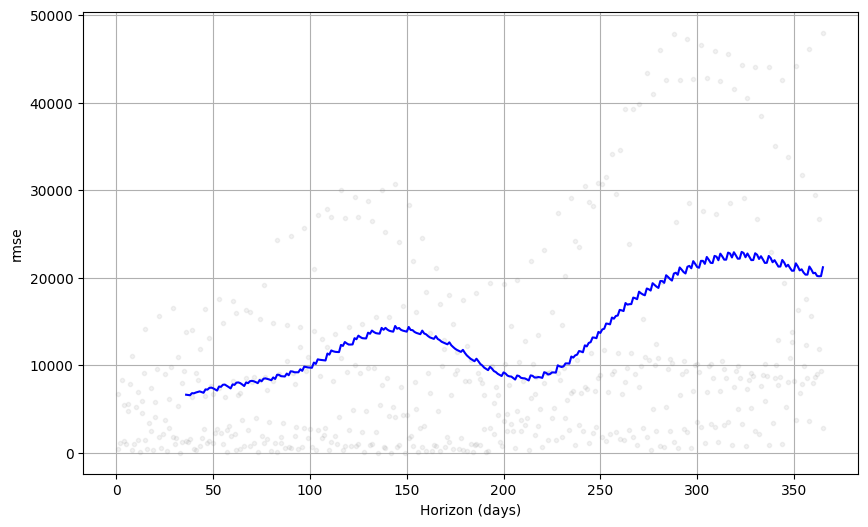


Средняя Абсолютная Ошибка (MAE): 20192.21
Средняя Квадратичная Ошибка (MSE): 407792495.93
Корень из Средней Квадратичной Ошибки (RMSE): 20193.87


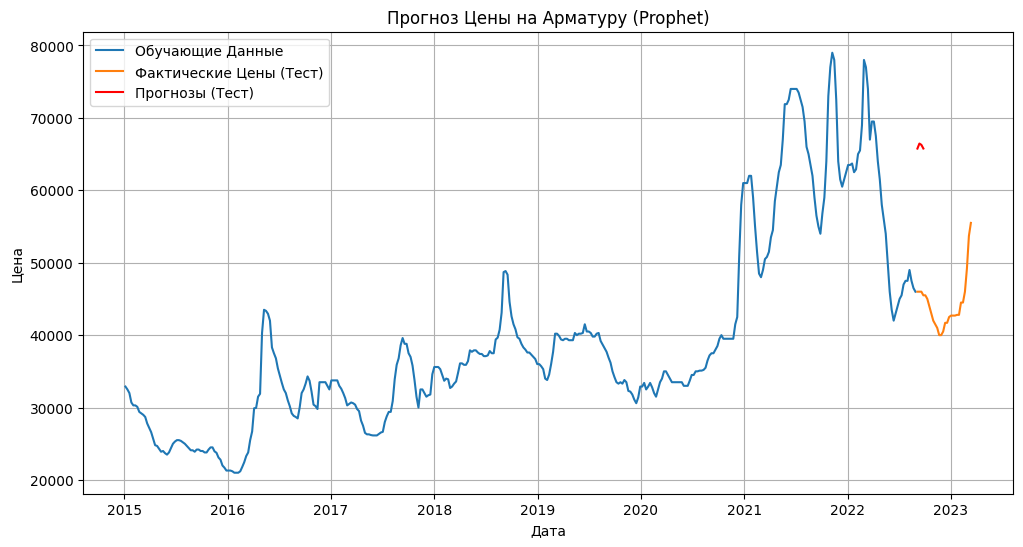

In [14]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Шаг 1: Загрузка и анализ данных (как и раньше)
try:
    df_train = pd.read_excel('train.xlsx')
    df_test = pd.read_excel('test.xlsx')
    print("Данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл не найден.")
    df_train = None
    df_test = None

if df_train is not None and df_test is not None:
    # Подготовка данных для Prophet (как и раньше)
    df_train = df_train.rename(columns={'dt': 'ds', 'Цена на арматуру': 'y'})
    df_train['ds'] = pd.to_datetime(df_train['ds'], errors='coerce')
    df_train = df_train.sort_values('ds')
    df_train = df_train.dropna(subset=['ds', 'y'])

    df_test = df_test.rename(columns={'dt': 'ds', 'Цена на арматуру': 'y'})
    df_test['ds'] = pd.to_datetime(df_test['ds'], errors='coerce')
    df_test = df_test.sort_values('ds')
    df_test = df_test.dropna(subset=['ds', 'y'])

    # Шаг 2: Настройка Prophet
    model = Prophet(growth='linear',  # или 'logistic'
                    seasonality_mode='additive',  # или 'multiplicative'
                    changepoint_prior_scale=0.05,  # Подберите значение
                    seasonality_prior_scale=10)  # Подберите значение

    # Добавление праздников (если нужно)
    # holidays = pd.DataFrame(...)
    # model = Prophet(holidays=holidays)

    # **Обучение модели ПЕРЕД кросс-валидацией**
    model.fit(df_train)

    # Шаг 3: Кросс-валидация
    try:
        initial = '730 days'   # Начальный период обучения (2 года)
        period  = '180 days'   # Период между отсечениями (6 месяцев)
        horizon = '365 days'   # Горизонт прогнозирования (1 год)

        df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon)

        # Вычисление метрик производительности
        df_p = performance_metrics(df_cv)
        print("\nМетрики производительности кросс-валидации:")
        print(df_p.head())

        # Визуализация метрик кросс-валидации (пример: RMSE)
        fig = plot_cross_validation_metric(df_cv, metric='rmse')
        plt.show()

        # **Обучение модели на всем наборе данных ПОСЛЕ кросс-валидации**
        #model.fit(df_train) # УЖЕ ОБУЧЕНА

        # Прогнозирование на тестовых данных (как и раньше)
        future = model.make_future_dataframe(periods=len(df_test))
        forecast = model.predict(future)
        forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

        # Оценка модели (как и раньше)
        merged_df = pd.merge(df_test, forecast_test[['ds', 'yhat']], on='ds', how='inner')
        mae = mean_absolute_error(merged_df['y'], merged_df['yhat'])
        mse = mean_squared_error(merged_df['y'], merged_df['yhat'])
        rmse = np.sqrt(mse)
        print(f'\nСредняя Абсолютная Ошибка (MAE): {mae:.2f}')
        print(f'Средняя Квадратичная Ошибка (MSE): {mse:.2f}')
        print(f'Корень из Средней Квадратичной Ошибки (RMSE): {rmse:.2f}')

        # Визуализация результатов (как и раньше)
        plt.figure(figsize=(12, 6))
        plt.plot(df_train['ds'], df_train['y'], label='Обучающие Данные')
        plt.plot(df_test['ds'], df_test['y'], label='Фактические Цены (Тест)')
        plt.plot(merged_df['ds'], merged_df['yhat'], label='Прогнозы (Тест)', color='red')
        plt.title('Прогноз Цены на Арматуру (Prophet)')
        plt.xlabel('Дата')
        plt.ylabel('Цена')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Произошла ошибка при кросс-валидации: {e}")

else:
    print("Ошибка: Не удалось загрузить данные.")

In [12]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Шаг 1: Загрузка и анализ данных (как и раньше)
try:
    df_train = pd.read_excel('train.xlsx')
    df_test = pd.read_excel('test.xlsx')
    print("Данные успешно загружены.")
except FileNotFoundError:
    print("Ошибка: Файл не найден.")
    df_train = None
    df_test = None

if df_train is not None and df_test is not None:
    # Подготовка данных для Prophet (как и раньше)
    df_train = df_train.rename(columns={'dt': 'ds', 'Цена на арматуру': 'y'})
    df_train['ds'] = pd.to_datetime(df_train['ds'], errors='coerce')
    df_train = df_train.sort_values('ds')
    df_train = df_train.dropna(subset=['ds', 'y'])

    df_test = df_test.rename(columns={'dt': 'ds', 'Цена на арматуру': 'y'})
    df_test['ds'] = pd.to_datetime(df_test['ds'], errors='coerce')
    df_test = df_test.sort_values('ds')
    df_test = df_test.dropna(subset=['ds', 'y'])

    # Шаг 2: Настройка Prophet (как и раньше, но без обучения!)
    model = Prophet(growth='linear',  # или 'logistic'
                    seasonality_mode='additive',  # или 'multiplicative'
                    changepoint_prior_scale=0.05,  # Подберите значение
                    seasonality_prior_scale=10)  # Подберите значение

    # Добавление праздников (если нужно)
    # holidays = pd.DataFrame(...)
    # model = Prophet(holidays=holidays)

    # Шаг 3: Кросс-валидация
    try:
        initial = '730 days'   # Начальный период обучения (2 года)
        period  = '180 days'   # Период между отсечениями (6 месяцев)
        horizon = '365 days'   # Горизонт прогнозирования (1 год)

        df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon) # УДАЛЕНО disable=True

        # Вычисление метрик производительности
        df_p = performance_metrics(df_cv)
        print("\nМетрики производительности кросс-валидации:")
        print(df_p.head())

        # Визуализация метрик кросс-валидации (пример: RMSE)
        fig = plot_cross_validation_metric(df_cv, metric='rmse')
        plt.show()

        # Обучение модели на всем наборе данных (после кросс-валидации)
        model.fit(df_train)

        # Прогнозирование на тестовых данных (как и раньше)
        future = model.make_future_dataframe(periods=len(df_test))
        forecast = model.predict(future)
        forecast_test = forecast[forecast['ds'].isin(df_test['ds'])]

        # Оценка модели (как и раньше)
        merged_df = pd.merge(df_test, forecast_test[['ds', 'yhat']], on='ds', how='inner')
        mae = mean_absolute_error(merged_df['y'], merged_df['yhat'])
        mse = mean_squared_error(merged_df['y'], merged_df['yhat'])
        rmse = np.sqrt(mse)
        print(f'\nСредняя Абсолютная Ошибка (MAE): {mae:.2f}')
        print(f'Средняя Квадратичная Ошибка (MSE): {mse:.2f}')
        print(f'Корень из Средней Квадратичной Ошибки (RMSE): {rmse:.2f}')

        # Визуализация результатов (как и раньше)
        plt.figure(figsize=(12, 6))
        plt.plot(df_train['ds'], df_train['y'], label='Обучающие Данные')
        plt.plot(df_test['ds'], df_test['y'], label='Фактические Цены (Тест)')
        plt.plot(merged_df['ds'], merged_df['yhat'], label='Прогнозы (Тест)', color='red')
        plt.title('Прогноз Цены на Арматуру (Prophet)')
        plt.xlabel('Дата')
        plt.ylabel('Цена')
        plt.legend()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Произошла ошибка при кросс-валидации: {e}")

else:
    print("Ошибка: Не удалось загрузить данные.")

Данные успешно загружены.
Произошла ошибка при кросс-валидации: Model has not been fit. Fitting the model provides contextual parameters for cross validation.
